# EJERCICIOS PYTHON - Julia Hernández Elena


# EJERCICIO 1 - Environment

### Crear un nuevo entorno de conda con python 3.7 con ciertas versiones instaladas:

In [ ]:
!conda create --yes --name ICAI_Tecnologias python=3.7

In [ ]:
!conda activate ICAI_Tecnologias

In [4]:
!conda search PyYAML==5.1

Loading channels: ...working... done
# Name                       Version           Build  Channel             
pyyaml                          3.12          py27_0  conda-forge         
pyyaml                          3.12          py27_1  conda-forge         
pyyaml                          3.12  py27h0c8e037_1  pkgs/main           
pyyaml                          3.12  py27ha287073_1  pkgs/main           
pyyaml                          3.12          py34_0  conda-forge         
pyyaml                          3.12          py35_0  conda-forge         
pyyaml                          3.12          py35_1  conda-forge         
pyyaml                          3.12  py35h4bf9689_1  pkgs/main           
pyyaml                          3.12  py35hfa6e2cd_1  pkgs/main           
pyyaml                          3.12          py36_0  conda-forge         
pyyaml                          3.12          py36_1  conda-forge         
pyyaml                          3.12  py36h1d1928f_1  pkgs/main

In [ ]:
!conda install --yes pyyaml==5.1

In [ ]:
!conda search numpy==1.15.4

In [ ]:
!conda install --yes numpy==1.15.4

In [ ]:
!conda search pandas==0.24.1

In [ ]:
!conda install --yes pandas==0.24.1

In [ ]:
!conda search python-dateutil==2.7.3

In [ ]:
!conda install --yes python-dateutil==2.7.3

In [ ]:
!conda search scikit-learn>=0.16.1

In [ ]:
!conda install --yes scikit-learn==0.20.1  

In [ ]:
!conda search scipy>=0.16.0

In [ ]:
!conda install --yes scipy==1.1.0

In [ ]:
!conda search six==1.12.0

In [ ]:
!conda install --yes six==1.12.0

Comprobamos que todos los paquetes se han instalado correctamente:

In [ ]:
!conda list -n ICAI_Tecnologias

### Crear un archivo con la configuración (environment.yml) e instalarlo:

In [ ]:
!conda activate ICAI_Tecnologias

In [ ]:
!conda env export > environment.yml

In [ ]:
!conda deactivate

In [ ]:
!conda env remove -n ICAI_Tecnologias

In [ ]:
!conda env create --file environment.yml

# EJERCICO 2 - Fibonacci

### Formula recursiva:

In [ ]:
def fibonacci_recurs(n):
    if n < 0:
        print("Incorrect input")
    
    # First Fibonacci number is 0
    elif n == 1:
        return 0
    
    # Second Fibonacci number is 1 
    elif n == 2:
        return 1
    else:
        return fibonacci_recurs(n - 1) + fibonacci_recurs(n - 2)

In [ ]:
##chequeamos
fibonacci_recurs(9)

### Formula con numero aureo:

In [ ]:
from math import sqrt as sqrt
def fibonacci_exp(n):
    n=n-1
    aureo = (1 + sqrt(5)) / 2 
    return int(((aureo**n)-(-aureo)**(-n)) / (sqrt(5)))

In [ ]:
##chequeamos
fibonacci_exp(9)

# EJERCICIO 3 - BeautifulSoup

### Generar el código necesario para automatizar la descarga y parseo de las siguiente películas:

In [14]:
peliculas = [

    'http://www.imdb.com/title/tt0071562',
    'http://www.imdb.com/title/tt0110912',
    'http://www.imdb.com/title/tt0050083',
    'http://www.imdb.com/title/tt0108052',
    'http://www.imdb.com/title/tt0468569',
    'http://www.imdb.com/title/tt0068646',
    'http://www.imdb.com/title/tt0167260',
    'http://www.imdb.com/title/tt0060196',
    'http://www.imdb.com/title/tt0137523',
    'http://www.imdb.com/title/tt0111161',

]

In [15]:
import requests
from bs4 import BeautifulSoup

In [16]:
def parsear_html(texto):
    soup = BeautifulSoup(texto,'lxml')
    item = dict()
    item['titulo'] = soup.find("h1").find(text=True).replace(u'\xa0',' ').strip()
    item['ratingvalue'] = float(soup.select_one('[itemprop="ratingValue"]').text)
    return item

###  Ordenar lista de pelis por ratingvalue:

In [22]:
# Descargamos la urls
urls = [requests.get(pelicula) for pelicula in peliculas]

In [23]:
urls

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [24]:
#Creamos una lista de diccionarios - Un diccionario con su info para cada pelicula
urls_parseadas = [parsear_html(url.content) for url in urls]

In [25]:
print(urls_parseadas)

[{'titulo': 'El padrino: Parte II', 'ratingvalue': 9.0}, {'titulo': 'Pulp Fiction', 'ratingvalue': 8.9}, {'titulo': '12 hombres sin piedad', 'ratingvalue': 8.9}, {'titulo': 'La lista de Schindler', 'ratingvalue': 8.9}, {'titulo': 'El caballero oscuro', 'ratingvalue': 9.0}, {'titulo': 'El padrino', 'ratingvalue': 9.2}, {'titulo': 'El señor de los anillos: El retorno del rey', 'ratingvalue': 8.9}, {'titulo': 'El bueno, el feo y el malo', 'ratingvalue': 8.8}, {'titulo': 'El club de la lucha', 'ratingvalue': 8.8}, {'titulo': 'Cadena perpetua', 'ratingvalue': 9.3}]


In [158]:
#Creamos la lista de diccionarios con el resultado del parseo ordenadas de mayor a menor ratingvalue
sorted_urls_parseadas = sorted(urls_parseadas, key=lambda url: url["ratingvalue"], reverse = True)

In [159]:
print(sorted_urls_parseadas)

[{'titulo': 'Cadena perpetua', 'ratingvalue': 9.3}, {'titulo': 'El padrino', 'ratingvalue': 9.2}, {'titulo': 'El padrino: Parte II', 'ratingvalue': 9.0}, {'titulo': 'El caballero oscuro', 'ratingvalue': 9.0}, {'titulo': 'Pulp Fiction', 'ratingvalue': 8.9}, {'titulo': '12 hombres sin piedad', 'ratingvalue': 8.9}, {'titulo': 'La lista de Schindler', 'ratingvalue': 8.9}, {'titulo': 'El señor de los anillos: El retorno del rey', 'ratingvalue': 8.9}, {'titulo': 'El bueno, el feo y el malo', 'ratingvalue': 8.8}, {'titulo': 'El club de la lucha', 'ratingvalue': 8.8}]


In [163]:
#EXTRA:
#Creamos un diccionario con el orden de ratingvalue como KEY, y el parseo de cada peli como VALUE
dictionary = dict()
for i in range (0, len(sorted_urls_parseadas)):
    dictionary[i+1] = sorted_urls_parseadas[i]

In [164]:
print(dictionary)

{1: {'titulo': 'Cadena perpetua', 'ratingvalue': 9.3}, 2: {'titulo': 'El padrino', 'ratingvalue': 9.2}, 3: {'titulo': 'El padrino: Parte II', 'ratingvalue': 9.0}, 4: {'titulo': 'El caballero oscuro', 'ratingvalue': 9.0}, 5: {'titulo': 'Pulp Fiction', 'ratingvalue': 8.9}, 6: {'titulo': '12 hombres sin piedad', 'ratingvalue': 8.9}, 7: {'titulo': 'La lista de Schindler', 'ratingvalue': 8.9}, 8: {'titulo': 'El señor de los anillos: El retorno del rey', 'ratingvalue': 8.9}, 9: {'titulo': 'El bueno, el feo y el malo', 'ratingvalue': 8.8}, 10: {'titulo': 'El club de la lucha', 'ratingvalue': 8.8}}


# EJERCICIO 4 - Vectores

In [1]:
!head files/vectores.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [69]:
import numpy as np

Cargamos la matrix y el vector:

In [133]:
beta = np.array([-10.749495878,-0.714877620,0.005738104])

In [134]:
matrix = np.genfromtxt('files/vectores.txt')

### Producto matriz-vector:
Varias maneras de hacer la multiplicación matrix-vector:

In [136]:
p = matrix.dot(beta)
print(p)

[ -6.56339698  -6.77530734  -4.58935913 ...  -5.89843396  -1.74635875
 -10.31146112]


In [137]:
p = matrix@beta
print(p)

[ -6.56339698  -6.77530734  -4.58935913 ...  -5.89843396  -1.74635875
 -10.31146112]


In [14]:
p = np.inner(matrix, beta)
print(p)

[ -6.56339698  -6.77530734  -4.58935913 ...  -5.89843396  -1.74635875
 -10.31146112]


### Calcular 'y' usando p:

In [140]:
y = 1/(1+np.exp(-p))

In [41]:
y

array([1.40909579e-03, 1.14031777e-03, 1.00571925e-02, ...,
       2.73623076e-03, 1.48507055e-01, 3.32487174e-05])

### Chequeamos que los valores se encuentra en [0,1]:

In [46]:
np.all([True for i in y if i>=0 and i<=1])

True

### Filtramos valores mayores a 0.5:

In [142]:
y = np.sort(y[y>0.5])
print(y)

[0.50539582 0.50926088 0.50973921 0.51412193 0.5144781  0.5168467
 0.52318182 0.52328834 0.52373802 0.52544993 0.52856831 0.52926095
 0.53542653 0.53575929 0.53750479 0.53825935 0.54121578 0.5414002
 0.54187551 0.54337684 0.54865393 0.55064373 0.55250612 0.55418929
 0.55474389 0.55798769 0.55819726 0.55993018 0.56099945 0.56686073
 0.56941307 0.57050141 0.57050656 0.5753001  0.57579382 0.57712487
 0.57814839 0.59497203 0.59737533 0.59988593 0.61412188 0.61578501
 0.61996686 0.62442851 0.62710655 0.62720029 0.62782019 0.62896247
 0.63236384 0.63511909 0.6363374  0.63807122 0.64026186 0.64267804
 0.65028239 0.65543637 0.65615843 0.66012558 0.66281111 0.66346946
 0.66460518 0.66675052 0.66697843 0.67050929 0.67254974 0.67396352
 0.67560425 0.67891782 0.68107203 0.68282816 0.68465514 0.68552491
 0.68585899 0.68699388 0.70001021 0.70326577 0.70371033 0.70448442
 0.70456528 0.71446514 0.71487285 0.71889416 0.71999464 0.72109056
 0.72304627 0.72679787 0.72764359 0.73263845 0.73659484 0.738689

In [143]:
#Chequeamos que lo hemos hecho bien:
np.all([True for i in y if i>0.5])

True

# EJERCICIO 5 - Panda Dataframes

In [144]:
import pandas as pd

### 1. Automatizar el proceso de lectura de todos los ficheros y conseguir una lista de DataFrame de pandas:

In [7]:
#Leemos un fichero en particular para corroborar que se lee bien
lectura = pd.read_csv("files_bolsa/file_12.csv",sep=",",header = 0) #coger la primera fila como header

In [8]:
lectura.head()

,GOOGL.Open,GOOGL.High,GOOGL.Low,GOOGL.Close,GOOGL.Volume,GOOGL.Adjusted,date
0,281.647,284.675,281.281,283.663666,4457100,283.663666,2009-11-10
1,97.287,98.428,95.410,96.046043,37640300,96.046043,2005-02-01
2,242.192,242.863,236.481,237.837845,13194700,237.837845,2006-10-27
3,185.115,186.256,181.992,184.559555,28611700,184.559555,2006-02-17
4,258.093,260.200,254.364,254.779785,6638500,254.779785,2010-05-11


In [146]:
#leemos cada cosa en el directorio y comprobamos que son archivos (no directorios) con el isfile
from os import listdir
from os.path import isfile, join
files = [f for f in listdir("files_bolsa") if isfile(join("files_bolsa", f))] 
print(files)

['file_1.csv', 'file_10.csv', 'file_100.csv', 'file_101.csv', 'file_102.csv', 'file_103.csv', 'file_104.csv', 'file_105.csv', 'file_106.csv', 'file_107.csv', 'file_108.csv', 'file_11.csv', 'file_12.csv', 'file_13.csv', 'file_14.csv', 'file_15.csv', 'file_16.csv', 'file_17.csv', 'file_18.csv', 'file_19.csv', 'file_2.csv', 'file_20.csv', 'file_21.csv', 'file_22.csv', 'file_23.csv', 'file_24.csv', 'file_25.csv', 'file_26.csv', 'file_27.csv', 'file_28.csv', 'file_29.csv', 'file_3.csv', 'file_30.csv', 'file_31.csv', 'file_32.csv', 'file_33.csv', 'file_34.csv', 'file_35.csv', 'file_36.csv', 'file_37.csv', 'file_38.csv', 'file_39.csv', 'file_4.csv', 'file_40.csv', 'file_41.csv', 'file_42.csv', 'file_43.csv', 'file_44.csv', 'file_45.csv', 'file_46.csv', 'file_47.csv', 'file_48.csv', 'file_49.csv', 'file_5.csv', 'file_50.csv', 'file_51.csv', 'file_52.csv', 'file_53.csv', 'file_54.csv', 'file_55.csv', 'file_56.csv', 'file_57.csv', 'file_58.csv', 'file_59.csv', 'file_6.csv', 'file_60.csv', 'file_

In [12]:
lista_df = [pd.read_csv("files_bolsa/" + file,sep=",",header = 0) for file in files]

In [28]:
type(lista_df)

pandas.core.frame.DataFrame

In [ ]:
type(lista_df[0]) #comprobamos que tenemos una lista de DataFrames

### 2. Conseguir un único DataFrame con toda la información del punto 1:

In [147]:
df = pd.concat(lista_df)

In [148]:
len(df)

3219

In [38]:
type(df)

pandas.core.frame.DataFrame

In [40]:
df.head()

,GOOGL.Open,GOOGL.High,GOOGL.Low,GOOGL.Close,GOOGL.Volume,GOOGL.Adjusted,date
0,263.824,264.510,260.260,263.478485,6611700,263.478485,2010-02-25
1,226.226,231.321,225.841,230.435440,7989800,230.435440,2009-08-20
2,287.883,291.517,286.286,291.371368,3628700,291.371368,2011-03-23
3,199.284,201.401,197.593,201.191193,6399500,201.191193,2009-05-04
4,297.432,301.802,292.107,300.885895,7643700,300.885895,2011-08-03


### 3. Ordenar el DataFrame por fecha:

In [44]:
ordered_df = df.sort_values(by='date') 

### 4. Calcular el máximo, mínimo y media por mes y año del valor ajustado (Adjusted):

In [62]:
#Creamos dos nuevas columnas, una con el año y otra con el mes
year = df.date.str.split('-').str[0]
month = df.date.str.split('-').str[1]

In [66]:
#Añadimos las columnas al dataframe
df['year'] = year
df['month'] = month

In [68]:
df.head()

,GOOGL.Open,GOOGL.High,GOOGL.Low,GOOGL.Close,GOOGL.Volume,GOOGL.Adjusted,date,year,month
date,,,,,,,,,
2010-02-25,263.824,264.510,260.260,263.478485,6611700,263.478485,2010-02-25,2010,02
2009-08-20,226.226,231.321,225.841,230.435440,7989800,230.435440,2009-08-20,2009,08
2011-03-23,287.883,291.517,286.286,291.371368,3628700,291.371368,2011-03-23,2011,03
2009-05-04,199.284,201.401,197.593,201.191193,6399500,201.191193,2009-05-04,2009,05
2011-08-03,297.432,301.802,292.107,300.885895,7643700,300.885895,2011-08-03,2011,08


In [79]:
#Creamos dataframes agrupadas por año y mes
by_year = df.groupby(year)
by_month = df.groupby(month)

##### Media, Max y Min de Ajusted por Año:

In [88]:
by_year['GOOGL.Adjusted'].agg(media=np.mean,maximo=np.max,minimo=np.min)   

,media,maximo,minimo
date,,,
2005,139.018562,216.236237,87.582581
2006,205.798448,255.080078,168.698700
2007,269.644864,371.266266,219.559555
2008,232.658667,343.007996,128.848846
2009,220.064231,311.746735,141.516510
2010,268.079627,313.698700,218.253250
2011,284.771855,323.273285,237.677673
2012,321.729969,384.409424,279.804810
2013,442.563933,560.915894,351.786774


##### Media, Max y Min de Ajusted por Mes:

In [89]:
by_month['GOOGL.Adjusted'].agg(media=np.mean,maximo=np.max,minimo=np.min)   

,media,maximo,minimo
date,,,
01,380.545201,858.450012,88.648651
02,378.650892,851.359985,93.028030
03,380.144503,872.369995,87.582581
04,380.054342,924.520020,90.110107
05,391.424154,996.169983,111.256256
06,394.117562,1004.280029,137.537537
07,404.966454,998.309998,144.024017
08,410.101974,955.239990,137.142136
09,414.207309,973.719971,143.268265


### 5. Pintar la serie temporal del valor de cierre:

In [90]:
import matplotlib.pyplot as plt

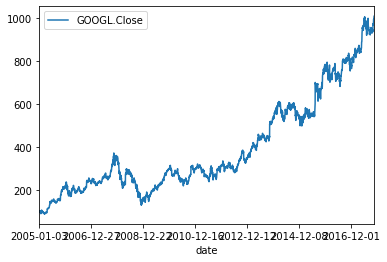

In [93]:
ordered_df.plot(x='date', y='GOOGL.Close')

# EJERCICIO 6 - Panda Dataframes

### 1. Leer el fichero de tipo json:

In [123]:
kpis = pd.read_json("files/kpis_marca.json").set_index('VARIABLE')

In [151]:
kpis = kpis.sort_values(['VARIABLE', 'MARCA']) #por limipieza

In [152]:
kpis

,MARCA,X2010,X2011,X2012
VARIABLE,,,,
Acts_responsibly_to_protect_the_environment_Clientes,Marca_1,62.7502,70.8048,64.7665
Acts_responsibly_to_protect_the_environment_Clientes,Marca_2,70.9782,69.2172,55.8536
Acts_responsibly_to_protect_the_environment_Clientes,Marca_3,69.4912,77.5783,60.7062
Acts_responsibly_to_protect_the_environment_Clientes,Marca_5,68.5990,71.0165,68.2326
Acts_responsibly_to_protect_the_environment_Clientes,Marca_6,69.7886,71.7573,63.5781
...,...,...,...,...
The_number_of_additional_health_care_coverage_of_health_policy_is_sufficient_Publico_General,Marca_1,61.7589,65.1954,62.7858
The_number_of_additional_health_care_coverage_of_health_policy_is_sufficient_Publico_General,Marca_2,58.9832,61.8087,59.8149
The_number_of_additional_health_care_coverage_of_health_policy_is_sufficient_Publico_General,Marca_3,59.2806,67.6297,63.1820


### 2. Para cada año y variable calcular la cuota de mercado y conseguir un DataFrame:

In [153]:
total_variable = kpis.groupby(kpis.index).sum()

In [127]:
total_variable

,X2010,X2011,X2012
VARIABLE,,,
Acts_responsibly_to_protect_the_environment_Clientes,341.6072,360.3741,313.1370
Acts_responsibly_to_protect_the_environment_Publico_General,296.8990,321.6379,285.7052
Adapts_quickly_to_change_Clientes,350.4299,369.0528,338.3899
Adapts_quickly_to_change_Publico_General,309.1912,339.2068,308.8786
Behaves_ethically_Clientes,359.6492,378.1548,349.6794
...,...,...,...
Stands_behind_its_products_and_services_Publico_General,317.1217,349.4730,325.6149
Supports_good_causes_Clientes,347.5551,358.6808,327.0013
Supports_good_causes_Publico_General,304.1355,331.3749,297.8862


In [155]:
kpis[['X2010', 'X2011', 'X2012']] = kpis[['X2010', 'X2011', 'X2012']] / total_variable

In [156]:
kpis

,MARCA,X2010,X2011,X2012
VARIABLE,,,,
Acts_responsibly_to_protect_the_environment_Clientes,Marca_1,0.183691,0.196476,0.206831
Acts_responsibly_to_protect_the_environment_Clientes,Marca_2,0.207777,0.192070,0.178368
Acts_responsibly_to_protect_the_environment_Clientes,Marca_3,0.203424,0.215272,0.193865
Acts_responsibly_to_protect_the_environment_Clientes,Marca_5,0.200813,0.197063,0.217900
Acts_responsibly_to_protect_the_environment_Clientes,Marca_6,0.204295,0.199119,0.203036
...,...,...,...,...
The_number_of_additional_health_care_coverage_of_health_policy_is_sufficient_Publico_General,Marca_1,0.201553,0.196617,0.200823
The_number_of_additional_health_care_coverage_of_health_policy_is_sufficient_Publico_General,Marca_2,0.192494,0.186403,0.191321
The_number_of_additional_health_care_coverage_of_health_policy_is_sufficient_Publico_General,Marca_3,0.193465,0.203958,0.202091
